# Introduction
#### Please upvote, motivate me to improve this kernel.
We're tasked to investigate the relationship between the _playing surface_ and the _injury_ and _performance_ of National Football League (NFL) athletes and to _examine factors that may contribute to lower extremity injuries._

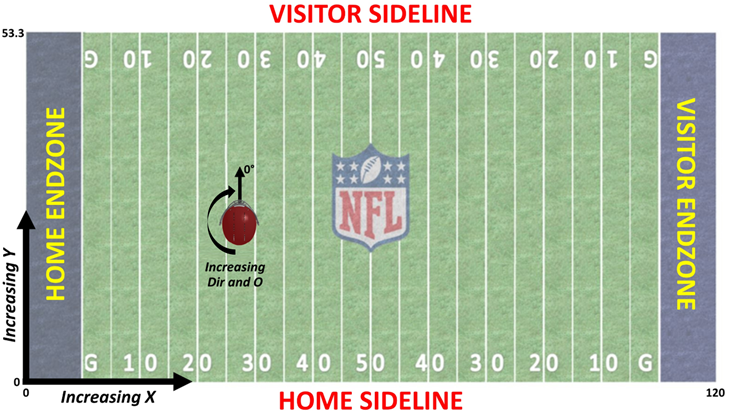




### What is the relationship between the playing surface and the injury and performance of National Football League (NFL) athletes 

Findings from the data analysis:
* ```Synthetic surface``` causes more _ankle_ injury than the ```Natural surface```,
* On the other hand, ```Natural surface``` games lead to more _knee_ injuries than ```Synthetic surface```.
* With respect to foot injury, one can conlcude that ```natural surface``` games lead to more _foot_ injuries than ```synthetic surfaces1```.



<p style="float: left; font-size: 9pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://artificialturfexpress.com/wp-content/uploads/2015/10/nrg-stadium-artificial-turf-field.jpg" style="width: 100%">Syntheic turf</p>
<p style="float: left; font-size: 9pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://images-na.ssl-images-amazon.com/images/I/3164kTNXjkL.jpg" style="width: 100%">Causes </p>
<p style="float: left; font-size: 9pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://cdn.newsapi.com.au/image/v1/861bd9a522cc078836d25e50036e8ec9?width=650" style="width: 100%">Ankle Injury</p>
<p style="float: left; font-size: 9pt; text-align: center; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://akns-images.eonline.com/eol_images/Entire_Site/20191010/rs_1024x759-191110182813-1024-david-spade-people-choice-awards.jpg?fit=inside|900:auto&output-quality=90" style="width: 100%">Awww!</p>







<p style="float: left; font-size: 9pt; text-align: center; width: 25%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://www.sportscasting.com/wp-content/uploads/2019/11/Natural-grass-at-Levis-Stadium.jpg" style="width: 100%">Natural turf</p>
<p style="float: left; font-size: 9pt; text-align: center; width: 25%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://images-na.ssl-images-amazon.com/images/I/3164kTNXjkL.jpg" style="width: 100%">Causes </p>
<p style="float: left; font-size: 9pt; text-align: center; width: 25%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRswd9PRd8vtVIz4XdvqbWrxWyT1p3eIVAHkKe9vbf30_1qQM_4&s" style="width: 100%">Knee Injury</p>
<p style="float: left; font-size: 9pt; text-align: center; width: 25%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJBYixnWKA8zlIB_FJoS5hR7dmYu6DroJgL_q6JZNFNPSdoWKl&s" style="width: 100%">Foot Injury</p>
<p style="float: left; font-size: 9pt; text-align: center; width: 100%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://i.ytimg.com/vi/jk5KWEpgm9A/maxresdefault.jpg" style="width: 50%">Awwwwww! Injury</p>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

from functools import reduce


import os 
import gc
import psutil

%matplotlib inline

# Data

In [ ]:
print(os.listdir("../input/nfl-playing-surface-analytics/"))

* Injury Record: The injury record file in .csv format contains information on 105 lower-limb injuries that occurred during regular season games over the two seasons. Injuries can be linked to specific records in a player history using the PlayerKey, GameID, and PlayKey fields.
```
['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42']
```

* Play List: – The play list file contains the details for the 267,005 player-plays that make up the dataset. Each play is indexed by PlayerKey, GameID, and PlayKey fields. Details about the game and play include the player’s assigned roster position, stadium type, field type, weather, play type, position for the play, and position group.
```
['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup']
```
* Player Track Data: player level data that describes the location, orientation, speed, and direction of each player during a play recorded at 10 Hz (i.e. 10 observations recorded per second).
```
['PlayKey', 'time', 'event', 'x', 'y', 'dir', 'dis', 'o', 's']
```



In [ ]:
#InjuryRecord = pd.read_csv("../input/nfl-playing-surface-analytics/InjuryRecord.csv")
#PlayList = pd.read_csv("../input/nfl-playing-surface-analytics/PlayList.csv")
#PlayerTrackData = pd.read_csv("../input/nfl-playing-surface-analytics/PlayerTrackData.csv")

* Link for memory optimization

https://www.dataquest.io/blog/pandas-big-data/

In [ ]:
# Sample 100 rows of data to determine dtypes.
#df_test = pd.read_csv("../input/nfl-playing-surface-analytics/PlayerTrackData.csv", nrows=100)

#float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
#float32_cols = {c: np.float32 for c in float_cols}
#float16_cols = {c: np.float16 for c in float_cols}

#PlayerTrackData = pd.read_csv("../input/nfl-playing-surface-analytics/PlayerTrackData.csv", engine='c', dtype=float16_cols)

## Helper function to reduce RAM/memory usage by 76% 

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [ ]:
InjuryRecord = import_data("../input/nfl-playing-surface-analytics/InjuryRecord.csv")
PlayList = import_data("../input/nfl-playing-surface-analytics/PlayList.csv")
PlayerTrackData = import_data("../input/nfl-playing-surface-analytics/PlayerTrackData.csv")

### Memory usage

we can get a better understanding of where we can reduce this memory usage.

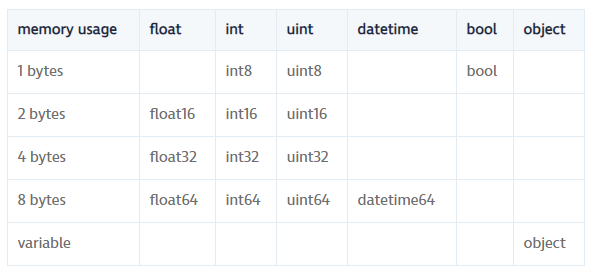

In [ ]:
#float_types = ["float16", "float32", "float64"]
#for it in float_types:
#    print(np.finfo(it))

In [ ]:
#InjuryRecord.info(memory_usage='deep')#memory usage: 35.7 KB
#PlayList.info(memory_usage='deep') #memory usage: 162.2 MB
PlayerTrackData.info(memory_usage='deep')#memory usage: 11.1 GB
# memory usage: 9.1 GB after converting float64 to float32
# memory usage: 8.1 GB after converting float64 to float32
# memory usage: 3.6 GB after converting object to category for "PlayKey" column
# memory usage: 1.4 GB after converting object to category for "event" column

In [ ]:
#PlayerTrackData["PlayKey"] = PlayerTrackData.PlayKey.astype('category')
# memory usage: 3.6 GB after converting object to category for "PlayKey" column
#PlayerTrackData["event"] = PlayerTrackData.event.astype('category')

In [ ]:
print("available RAM:", psutil.virtual_memory())
gc.collect()
print("available RAM:", psutil.virtual_memory())

In [ ]:
#PlayerTrackData.describe()

1. #### Memory usage for our numeric columns.

In [ ]:
print(InjuryRecord.columns)
print(PlayList.columns)
print(PlayerTrackData.columns)

In [ ]:
print(PlayerTrackData.shape)
print(PlayList.shape)
print(InjuryRecord.shape)

Note that there is not a PlayKey available for every injury. This indicates that the game in which the injury occurred is known, but the specific play in which the injury occurred was not noted at the time of injury.

In [ ]:
PlayerTrackData.head(4)

In [ ]:
PlayList.head(2)

In [ ]:
InjuryRecord.head(3)

# EDA

In [ ]:
sns.catplot(x="BodyPart", data=InjuryRecord, kind="count", order = InjuryRecord['BodyPart'].value_counts().index)

In [ ]:
sns.catplot(x="Surface", data=InjuryRecord, kind="count")

In [ ]:
sns.catplot(x="RosterPosition", data=PlayList, kind="count", order = PlayList['RosterPosition'].value_counts().index)
plt.gcf().set_size_inches(16, 8)

In [ ]:
sns.catplot(x="PlayerDay", data=PlayList, kind="count")
plt.gcf().set_size_inches(100, 8)

In [ ]:
sns.catplot(x="StadiumType", data=PlayList, kind="count", order = PlayList['StadiumType'].value_counts().index)
plt.gcf().set_size_inches(50, 8)

_Standium Type_ column has many repeated entry with slight typos e.g. Outdoor, Outdoors etc. Therefore, we need to clean this up and update the column with correct _Standium type._

In [ ]:
sns.catplot(x="Weather", data=PlayList, kind="count")
plt.gcf().set_size_inches(450, 8)

_Weather_ column has many repeated entry with slight typos e.g. clean and warm, most cloudy, sunny, clear etc. Therefore, we need to clean this up and update the column with correct _Weather._

In [ ]:
sns.catplot(x="PlayType", data=PlayList, kind="count", order = PlayList['PlayType'].value_counts().index)
plt.gcf().set_size_inches(16, 8)

In [ ]:
sns.catplot(x="Position", data=PlayList, kind="count", order = PlayList['Position'].value_counts().index)
plt.gcf().set_size_inches(16, 8)

In [ ]:
sns.catplot(x="PlayerGamePlay", data=PlayList, kind="count")
plt.gcf().set_size_inches(50, 8)

In [ ]:
sns.catplot(x="PositionGroup", data=PlayList, kind="count", order = PlayList['PositionGroup'].value_counts().index )
plt.gcf().set_size_inches(16, 8)

#### NOTES

The GameID field is a unique identifier of player games but does not strictly reflect the order in which the games were played. The PlayerDay is an integer sequence that provides an accurate timeline for player game participation. In order to generate an accurate timeline of an individual player’s game participation, the PlayerDay variable should be used.

In [ ]:
PlayerTrackData.event.value_counts()

In [ ]:
print(PlayerTrackData.event.unique())

```event``` column has 81 unique categories( 1 bbeing Nan); serious need to clean the data by removing similar events e.g. free_kick and free_kick_play sounds same. 

#### Visualize InjuryRecord table data


```Knee``` injury is most frequent, closely followed by ```Ankle``` injuries among the players. While, ```foot``` and ```toe``` injuries are low. Injury to ```HeelBodyPart``` is least.

In [ ]:
InjuryRecord.BodyPart.value_counts()

In [ ]:
sns.catplot(x="BodyPart", data=InjuryRecord, kind="count", order = InjuryRecord['BodyPart'].value_counts().index)
plt.gcf().set_size_inches(16, 8)

Check what kind of injuries lead to how many days on non-play for the players.

In [ ]:
InjuryRecord.DM_M1.value_counts()

In [ ]:
sns.catplot(x="DM_M1", hue='BodyPart', data=InjuryRecord, kind="count",  order = InjuryRecord['DM_M1'].value_counts().index )

In [ ]:
InjuryRecord.DM_M7.value_counts()

In [ ]:
#sns.catplot(x="DM_M7", hue='BodyPart', data=InjuryRecord, kind="count")
sns.catplot(x="DM_M7", hue='BodyPart', data=InjuryRecord[(InjuryRecord.DM_M7==1)], kind="count")


In [ ]:
InjuryRecord.DM_M28.value_counts()

In [ ]:
sns.catplot(x="DM_M28", hue='BodyPart', data=InjuryRecord[(InjuryRecord.DM_M28==1)], kind="count")

In [ ]:
InjuryRecord.DM_M42.value_counts()

In [ ]:
sns.catplot(x="DM_M42", hue='BodyPart', data=InjuryRecord[(InjuryRecord.DM_M42==1)], kind="count")

### Data Cleaning
Staium names repeated with slight variation in ```PlayList``` table.

In [ ]:
PlayList.StadiumType = PlayList.StadiumType.str.lower()
PlayList.StadiumType = PlayList.StadiumType.str.strip()
PlayList.StadiumType = PlayList.StadiumType.str.rstrip()
PlayList.StadiumType = PlayList.StadiumType.str.lstrip()

In [ ]:
stadium_name = PlayList.StadiumType.unique()
print(len(stadium_name))
# printing the list using * and sep operator 
print("printing lists separated by commas") 
  
print(*stadium_name, sep = "/") 

In [ ]:
#Similar word array:
array_outdoors = ["outdoor", "oudoor", "ourdoor",
                 "outddors", "outdor", "outside", "heinz field"]
array_indoors = ["indoor", "indoor", "indoor", "retractable roof"]
array_open = [" open", "outdoor retr roof-open", "retr. roof-open",
             "open roof", "retr. roof - open", " open roof", " open roof ", "indoor, open roof", "domed, open"] #1 issue
array_closed = ["closed dome"," closed","  closed", "domed", "dome", "retr. roof-closed",
               "bowl", "closed", "retr. roof closed", " roof closed","roof closed", "retr. roof - closed", "  roof closed",
               "domed, closed", "indoor, roof closed", "dome, closed"]
#array_

Use arrays above to replace the entries with correct word in ```StadiumType``` column of ```PlayList```

In [ ]:
#df.replace(0, 5)
PlayList["StadiumType"] = PlayList["StadiumType"].replace(array_outdoors, "outdoors" )
PlayList["StadiumType"] = PlayList["StadiumType"].replace(array_indoors, "indoors" )
PlayList["StadiumType"] = PlayList["StadiumType"].replace(array_open, "open" )
PlayList["StadiumType"] = PlayList["StadiumType"].replace(array_closed, "closed" )

### Merge table

Let us make a master table by merging the three tables for the actual injury_record based on PlayKey, GameID, and PlayerKey i.e. there were 105 injury recorded. 

Use ```InjuryRecord``` all the rows and join it to Play_list. Then join the resulting table to ```PlayerTrackRecord``` for all those games- with all the play for that given game in which injury occured. This should be our master table for further analysis.

In [ ]:
InjuryRecord.head(2)

In [ ]:
PlayList.head(2)

In [ ]:
PlayList.loc[PlayList['PlayKey']=="39873-4-32"]

Let us join ```InjuryRecord``` and ```PlayList``` table on ```PlayKey``` where the injury occured i.e. use left join.

In [ ]:
#result = pd.merge(InjuryRecord,
#                 PlayList,
#                 on='PlayKey', 
#                 how='left')
Injury_games_play = InjuryRecord.merge(PlayList,
                  on='PlayKey',
                  how='left')

In [ ]:
Injury_games_play.tail()

In [ ]:
Injury_games_play.isna().sum()

Now, we see that for ```28``` Player in InjuryRecord, the PlayKey is missing. 

In [ ]:
#Drop rows with Nan in PlayKey column
Injury_games_play = Injury_games_play[pd.notnull(Injury_games_play['PlayKey'])]

In [ ]:
Injury_games_play.tail()

In [ ]:
Injury_games_play.shape

Therefore, out of 105 ```InjuryRecord``` we have only 77 rows with ```PlayKey``` that is being used for further analysis.

#### EDA on InjuryRecord and Play where injury occured.

In [ ]:
Injury_games_play.columns

In [ ]:
sns.catplot(x="BodyPart", hue='StadiumType', data=Injury_games_play, kind="count")

In [ ]:
Injury_games_play.isna().sum()

In [ ]:
Injury_games_play=Injury_games_play.dropna()

In [ ]:
data=Injury_games_play[['BodyPart', 'Surface', 'RosterPosition', 'PlayerDay', 'PlayerGame', 'StadiumType', 'FieldType',
       'Temperature', 'Weather', 'PlayType', 'PlayerGamePlay', 'Position',
       'PositionGroup']]

ax = sns.pairplot(data, hue='BodyPart', kind="reg")

## Findings:
- Players' foot injuries increase with increasing number of PlayDay, suggests players need to take break after certain number of games. Count of game-play is an area of study.
- Players' knee injury increase with decreasing temperature.

### Relationship between the playing surface and the injury

In [ ]:
sns.catplot(x="BodyPart", hue='Surface', data=Injury_games_play, kind="count")

From the plot above, following points can be concluded:
* ```Synthetic surface``` causes more _ankle_ injury than the ```Natural surface```,
* On the other hand, ```Natural surface``` games lead to more _knee_ injuries than ```Synthetic surface```.
* With respect to foot injury, one can conlcude that ```natural surface``` games lead to more _foot_ injuries than ```synthetic surfaces1```.

In [ ]:
Injury_games_play.head()

In [ ]:
Injury_games_play.info()

In [ ]:
Injury_games_play.loc[Injury_games_play['PlayerKey_x'] == 39873]

In [ ]:
Injury_games_play.shape

In [ ]:
print(InjuryRecord.shape)
print(PlayList.shape)
print(PlayerTrackData.shape)

In [ ]:
PlayList.head(4)

Join the three basic tables on key "PlayKey".

In [ ]:
dfs = [PlayList, InjuryRecord, PlayerTrackData]

In [ ]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='PlayKey'), dfs)

In [ ]:
df_final.shape

In [ ]:
print(df_final.head(10))

In [ ]:
df_final.tail(10)

In [ ]:
df_final.isna().sum()

## Speed comparison

In [ ]:
df_final.groupby('PlayKey')[['s']].max() \
    .sort_values('s', ascending=False) \
    .query('s != 0').head(10) \
    .plot(kind='barh', figsize=(15, 5), title='Top 10 Plays by Max Player Speed')
plt.show()

df_final.groupby('PlayKey')[['s']].max() \
    .sort_values('s', ascending=True) \
    .query('s != 0').head(10) \
    .plot(kind='barh', figsize=(15, 5), title='Bottom 10 Plays by Min Player Speed')
plt.show()